In [18]:
import duckdb
import pandas as pd

# Loading dataset
df = pd.read_csv("/kaggle/input/ai-job-dataset/ai_job_dataset.csv")

# Register DataFrame as a DuckDB table
duckdb.register("jobs", df)








In [32]:

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

query = """
SELECT company_location, AVG(salary_usd) AS avg_salary
FROM df
GROUP BY company_location
ORDER BY avg_salary DESC
LIMIT 5
"""

result = pysqldf(query)
result


,company_location,avg_salary
0,Switzerland,170639.085791
1,Denmark,165652.249357
2,Norway,159490.533981
3,United States,146833.045580
4,United Kingdom,128720.186557


In [35]:

query = """
SELECT company_location, AVG(salary_usd) AS avg_salary
FROM df
GROUP BY company_location
ORDER BY avg_salary DESC
LIMIT 5
"""

result = duckdb.query(query).df()
result



,company_location,avg_salary
0,Switzerland,170639.085791
1,Denmark,165652.249357
2,Norway,159490.533981
3,United States,146833.045580
4,United Kingdom,128720.186557


##Top 5 Highest Paying Countries



In [33]:
query = """
SELECT experience_level, AVG(salary_usd) AS avg_salary
FROM df
GROUP BY experience_level
ORDER BY avg_salary DESC
LIMIT 5
"""

result = duckdb.query(query).df()
result


,experience_level,avg_salary
0,EX,187723.647340
1,SE,122187.657845
2,MI,87955.471833
3,EN,63133.377084


 ##Average Salary by Experience Level

In [19]:
duckdb.query("""
SELECT remote_ratio, AVG(salary_usd) AS avg_salary
FROM jobs
GROUP BY remote_ratio
ORDER BY remote_ratio DESC
""").df()
 


,remote_ratio,avg_salary
0,100,116160.545935
1,50,115776.806793
2,0,114140.231133


##Remote Ratio Impact on Salary

In [20]:
high_salary = df[df['salary_usd'] > df['salary_usd'].median()]
skills = high_salary['required_skills'].dropna().str.split(', ').explode()
skills.value_counts().head(10)


required_skills
Python        2177
SQL           1660
Kubernetes    1531
TensorFlow    1499
Scala         1418
PyTorch       1398
Git           1373
Linux         1309
Java          1290
GCP           1227
Name: count, dtype: int64

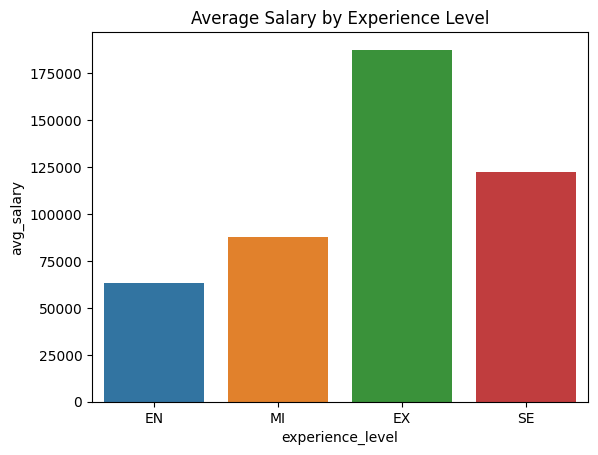

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

exp_salary = duckdb.query("""
SELECT experience_level, AVG(salary_usd) AS avg_salary
FROM jobs
GROUP BY experience_level
""").df()

sns.barplot(data=exp_salary, x='experience_level', y='avg_salary')
plt.title('Average Salary by Experience Level')
plt.show()


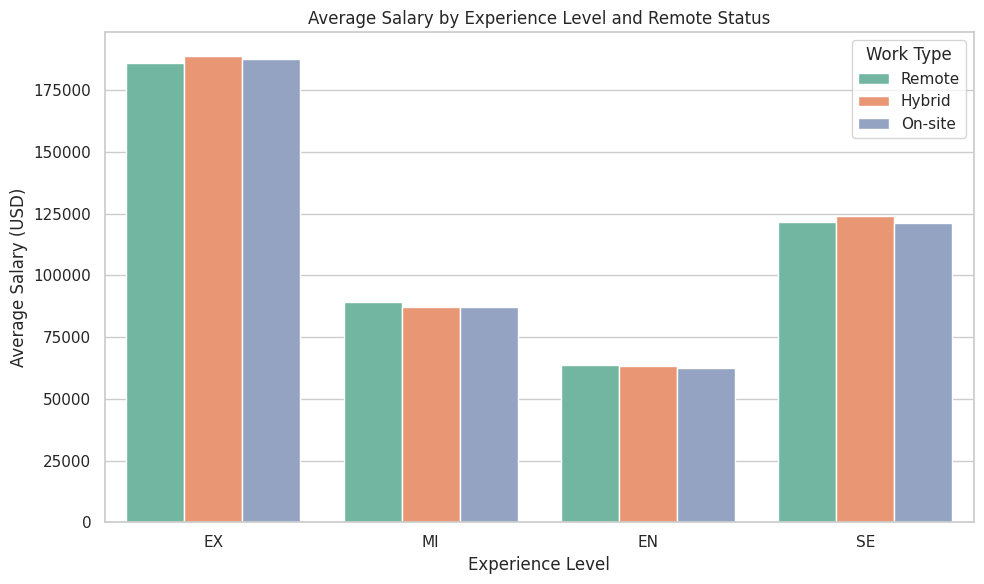

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import duckdb

# Query: group by experience and remote_ratio
df = duckdb.query("""
    SELECT experience_level, remote_ratio, AVG(salary_usd) AS avg_salary
    FROM jobs
    GROUP BY experience_level, remote_ratio
""").df()

# Map remote_ratio to readable labels
remote_map = {0: 'On-site', 50: 'Hybrid', 100: 'Remote'}
df['remote_label'] = df['remote_ratio'].map(remote_map)

# Plot: grouped bars by experience level and remote status
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='experience_level', y='avg_salary', hue='remote_label', palette='Set2')
plt.title('Average Salary by Experience Level and Remote Status')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.legend(title='Work Type')
plt.tight_layout()
plt.show()


##Most Common Skills in High-Salary Jobs

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


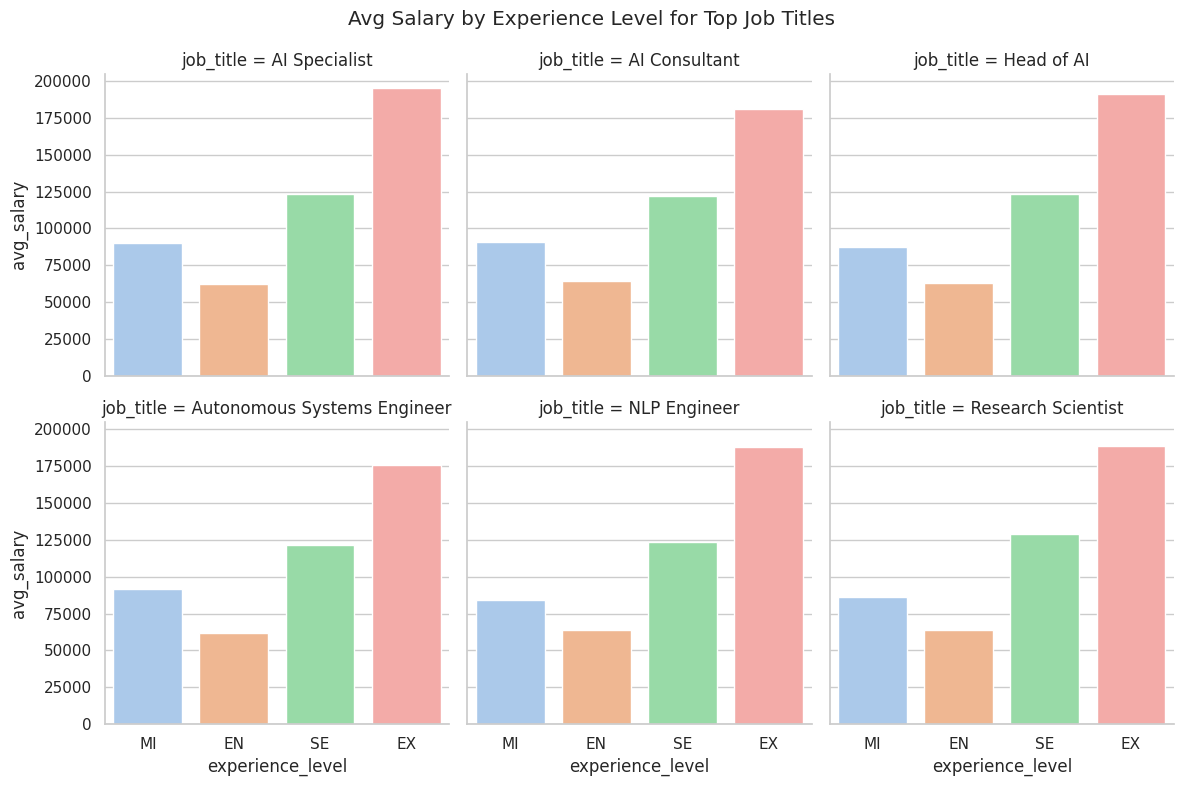

<Figure size 640x480 with 0 Axes>

In [52]:
df = duckdb.query("""
    SELECT experience_level, job_title, AVG(salary_usd) AS avg_salary
    FROM jobs
    GROUP BY experience_level, job_title
""").df()

# Filter common job titles (optional)
top_titles = df['job_title'].value_counts().index[:6]
df = df[df['job_title'].isin(top_titles)]

# Plot: small charts for each job title
g = sns.catplot(data=df, x='experience_level', y='avg_salary',
                col='job_title', col_wrap=3,
                kind='bar', height=4, aspect=1,
                palette='pastel')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Avg Salary by Experience Level for Top Job Titles')
plt.show()



In [6]:
import pandas as pd

# Load the dataset from Kaggle (make sure path matches your file)
df = pd.read_csv("/kaggle/input/ai-job-dataset/ai_job_dataset.csv")
# Avoid division by zero
df['years_experience'] = df['years_experience'].replace(0, 0.1)

# Create new metric
df['salary_per_year'] = df['salary_usd'] / df['years_experience']

# Top 10 high-efficiency earners
df[['job_title', 'salary_usd', 'years_experience', 'salary_per_year', 'required_skills']]\
  .sort_values(by='salary_per_year', ascending=False)\
  .head(10)


,job_title,salary_usd,years_experience,salary_per_year,required_skills
10179,Data Scientist,129909,0.1,1299090.0,"SQL, Git, AWS, Linux, Java"
13637,Deep Learning Engineer,129674,0.1,1296740.0,"Data Visualization, Linux, SQL, Scala"
6172,Robotics Engineer,128677,0.1,1286770.0,"Python, TensorFlow, AWS, Java, Git"
3899,NLP Engineer,126242,0.1,1262420.0,"Scala, GCP, Computer Vision"
5288,Data Scientist,124467,0.1,1244670.0,"Java, Computer Vision, Kubernetes, Scala, PyTorch"
13451,NLP Engineer,123764,0.1,1237640.0,"Python, TensorFlow, PyTorch, Java"
6249,AI Research Scientist,123746,0.1,1237460.0,"Kubernetes, Java, Spark"
3688,Machine Learning Engineer,120678,0.1,1206780.0,"Linux, Java, Statistics"
10713,AI Architect,120637,0.1,1206370.0,"Deep Learning, Computer Vision, Docker, Hadoop"
2124,Principal Data Scientist,120019,0.1,1200190.0,"Hadoop, AWS, Python, Spark"


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


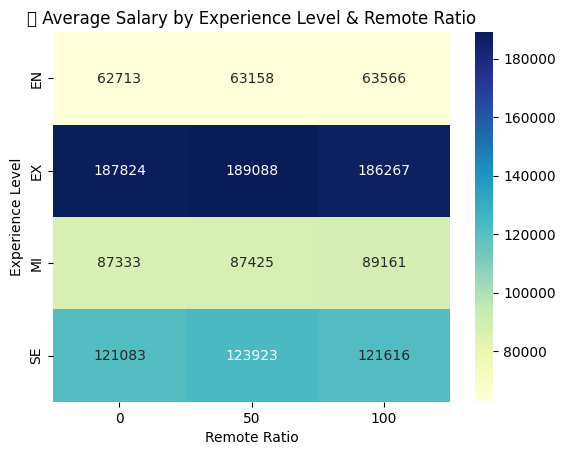

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = df.pivot_table(
    index='experience_level',
    columns='remote_ratio',
    values='salary_usd',
    aggfunc='mean'
)

sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("💼 Average Salary by Experience Level & Remote Ratio")
plt.xlabel("Remote Ratio")
plt.ylabel("Experience Level")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


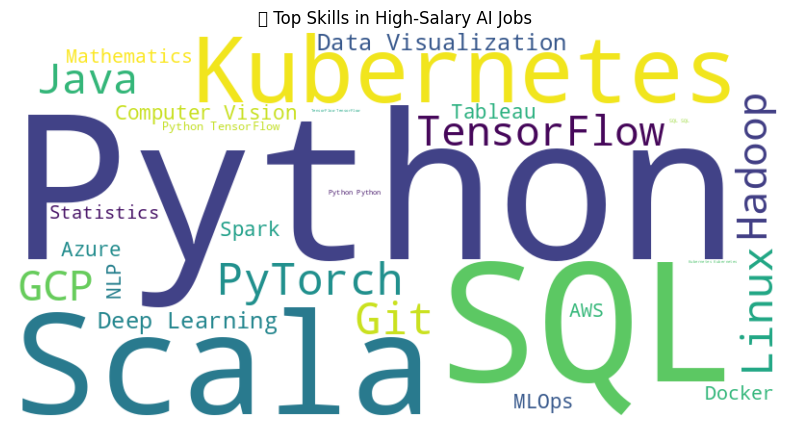

In [8]:
from wordcloud import WordCloud

high_salary_jobs = df[df['salary_usd'] > df['salary_usd'].quantile(0.75)]
skills = high_salary_jobs['required_skills'].dropna().str.cat(sep=', ')
skills = skills.replace(',', ' ')  # remove commas

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("🌟 Top Skills in High-Salary AI Jobs")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


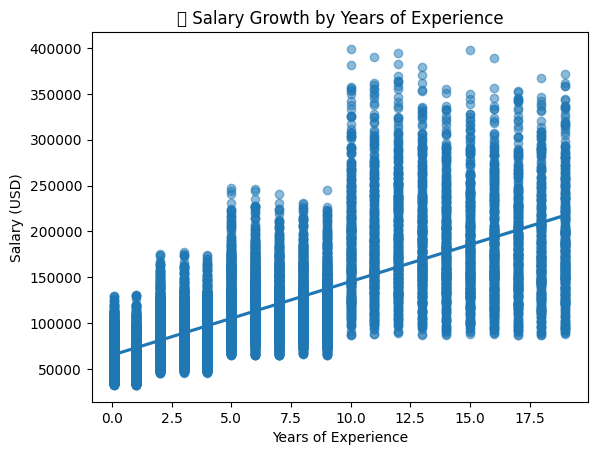

In [9]:
sns.regplot(data=df, x='years_experience', y='salary_usd', scatter_kws={'alpha':0.5})
plt.title("📈 Salary Growth by Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (USD)")
plt.show()
